<a href="https://colab.research.google.com/github/SanjayShetty01/ANZ-Data/blob/main/Tast-2/ANZBank_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task-2

Predictive Analytics

Explore correlations between customer attributes, build a regression and a decision-tree prediction model based on your findings.

Load the libraries

In [1]:
# Download the neccessary Debian (Linux) packages requied for tidygeocoder

system("sudo apt-get install libgdal-dev libproj-dev libudunits2-dev libprotobuf-dev libjq-dev")

In [2]:
install.packages('pacman')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# Load the necessary R pacakges

pacman::p_load(caret,dplyr,xlsx,ggplot2,fastDummies,modelr,
              rpart, tidyr, tidygeocoder,stringr, Metrics,
              qdapRegex, mlr, glmnet, lubridate, sgd, corrplot)

options(warn = -1) # disable warning messages globally

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’



caret installed

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rJava’, ‘xlsxjars’



xlsx installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


fastDummies installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


tidygeocoder installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Metrics installed

Installing package into ‘/usr/local

Load the data

In [4]:
# Download the data from Github

download.file('https://github.com/SanjayShetty01/ANZ-Data/blob/main/data/ANZ%2520synthesised%2520transaction%2520dataset.xlsx;%20filename%252A.xlsx?raw=true',
destfile = '/content/anzData.xlsx')

In [5]:
# Loading the data

data = read.xlsx('anzData.xlsx', as.data.frame = T,sheetIndex = 1)

In [6]:
head(data)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,⋯,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,authorized,1,NA,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NA,Diana,⋯,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
2,authorized,0,NA,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NA,Diana,⋯,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
3,authorized,1,NA,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NA,Michael,⋯,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
4,authorized,1,NA,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NA,Rhonda,⋯,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
5,authorized,1,NA,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NA,Diana,⋯,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
6,posted,NA,NA,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NA,NA,Robert,⋯,20,NA,NA,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NA,debit


Cleaning and Pre- Processing data

In [7]:
#Separating the long and lat to separate columns 

data = (separate(data, long_lat, c('long', 'lat'), ' ' ))

In [8]:
# Converting the character to Numeric object

data$lat = as.numeric(data$lat)
data$long = as.numeric(data$long)

In [9]:
# remove the mislocated locations

data = filter(data, long < 200)

In [10]:
dataWSalary <- filter(data, txn_description == 'PAY/SALARY')

In [11]:
# Finding number of unique values 
rapply(dataWSalary, function(x) length(unique(x)))

status card_present_flag  bpay_biller_code           account 
                1                 1                 1                99 
         currency              long               lat   txn_description 
                1                86                84                 1 
      merchant_id     merchant_code        first_name           balance 
                1                 1                79               876 
             date            gender               age   merchant_suburb 
               65                 2                33                 1 
   merchant_state        extraction            amount    transaction_id 
                1               394                99               876 
          country       customer_id merchant_long_lat          movement 
                1                99                 1                 1

In [12]:
head(dataWSalary)

,status,card_present_flag,bpay_biller_code,account,currency,long,lat,txn_description,merchant_id,merchant_code,⋯,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,posted,NA,0,ACC-588564840,AUD,151.27,-33.76,PAY/SALARY,NA,0,⋯,23,NA,NA,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NA,credit
2,posted,NA,0,ACC-1650504218,AUD,145.01,-37.93,PAY/SALARY,NA,0,⋯,23,NA,NA,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NA,credit
3,posted,NA,0,ACC-3326339947,AUD,151.18,-33.80,PAY/SALARY,NA,0,⋯,22,NA,NA,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NA,credit
4,posted,NA,0,ACC-3541460373,AUD,145.00,-37.83,PAY/SALARY,NA,0,⋯,24,NA,NA,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NA,credit
5,posted,NA,0,ACC-2776252858,AUD,144.95,-37.76,PAY/SALARY,NA,0,⋯,43,NA,NA,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NA,credit
6,posted,NA,0,ACC-1598451071,AUD,153.41,-27.95,PAY/SALARY,NA,0,⋯,26,NA,NA,2018-08-01T14:00:00.000+0000,1013.67,a72c9dd8b4614a1982ff71f8b62677ad,Australia,CUS-2487424745,NA,credit


In [13]:
dataAnnualN = dataWSalary[, c('account', 'balance', 'date','amount', 'gender', 'lat', 'long')]

In [14]:
head(dataAnnualN)

,account,balance,date,amount,gender,lat,long
,<chr>,<dbl>,<date>,<dbl>,<chr>,<dbl>,<dbl>
1,ACC-588564840,8342.11,2018-08-01,3903.95,M,-33.76,151.27
2,ACC-1650504218,2040.58,2018-08-01,1626.48,F,-37.93,145.01
3,ACC-3326339947,3158.51,2018-08-01,983.36,M,-33.80,151.18
4,ACC-3541460373,2517.66,2018-08-01,1408.08,M,-37.83,145.00
5,ACC-2776252858,2271.79,2018-08-01,1068.04,F,-37.76,144.95
6,ACC-1598451071,1017.52,2018-08-01,1013.67,F,-27.95,153.41


In [15]:
# Calculate annual salary of each individual account holder


dataAnnualN$dataDiff = 0
dataAnnualN$AnnualSalary = 0


for (i in seq(nrow(dataAnnualN))){
  for (j in ((i+1): seq(nrow(dataAnnualN)))){
    if(i == j){
      next
    }
    if( j > nrow(dataAnnualN) ){
      next
    }
    if(i !=j){
       if (dataAnnualN[i, 1]  == dataAnnualN[j,1]){
          dataAnnualN[i,8] <- abs(as.numeric(dataAnnualN[i,3]-dataAnnualN[j,3]))
      
          dataAnnualN[i,9] = dataAnnualN[i,4]*(364/abs(dataAnnualN[i,8]))
       }
      else{
        next
      }
        
    }
  }
  
}

# some account had some instance of recurring amount of salary on the same day, which resulted in Inf output in 
# 8 accounts, even though the the salary remained the same for previous time-frame and the next time-frame 
# hence assuming that the recurring amount to be a clerical error or other early withdrawal of future salary
# rather than a salary bump


## extract the annual salary of every account (ignore the Inf and zero value)

dataAnnualN[dataAnnualN == 0 | dataAnnualN == Inf] <-  NA

dataAnnualN <- dataAnnualN[complete.cases(dataAnnualN),]

dataAnnualN <- dataAnnualN[!duplicated(dataAnnualN$account),]


In [16]:
# data_ml_sal_cleaned now contains the frequency of pay i.e, whether the payment of salary
# is done in weekly basis (7 days), bi weekly basis (14 days) etc.  and the annual salary

## checking all the various frequencies of pay

unique(dataAnnualN$dataDiff)

## the values contains 31, 30 and 32, this is because of the uneven distribution of number
## of days in a month. 

[1]  7 14 28 31 30 32 61

Frequency Distribution of Annual Salaries of Custumors 

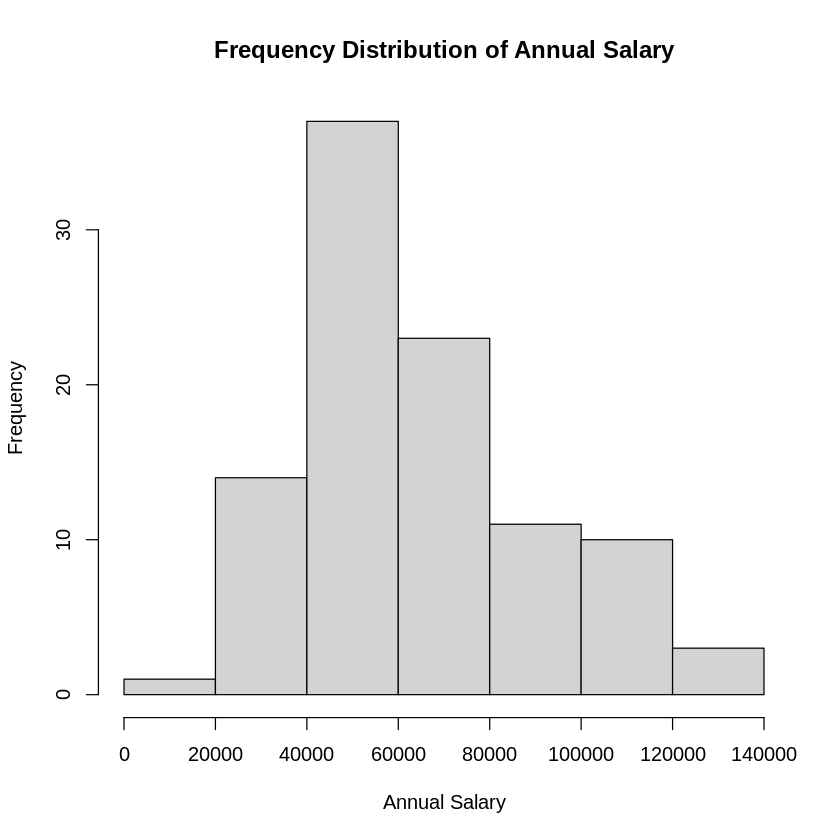

In [17]:
hist(dataAnnualN$AnnualSalary, xlab = 'Annual Salary',
     main = 'Frequency Distribution of Annual Salary')

### Feature Engineering

In [18]:
# library(httr)
# library(rvest)

# AusAvSal = read_html('https://www.abs.gov.au/statistics/labour/earnings-and-work-hours/average-weekly-earnings-australia/nov-2021') |>
#              html_nodes(xpath = '//*[@id="chart-data-table_XK7Zu2sHhl"]') |>
#              html_table() |>
#              data.frame()

# colnames(AusAvSal) = c('State','Person' ,'Male', 'Female')

# AusAvSal = AusAvSal[AusAvSal$State != 'Aust.',]

# write.csv(AusAvSal, '/content/AverageSalary.csv', row.names = F)

In [19]:
# Download the file scaped from the Australian Bureau of Statistics 

download.file('https://github.com/SanjayShetty01/ANZ-Data/raw/main/data/AverageSalary.csv', 
              destfile = '/content/averageSalary.csv')

AusAvSal = read.csv('averageSalary.csv')

In [20]:
AusAvSal

State,Person,Male,Female
<chr>,<chr>,<chr>,<chr>
NSW,"1,761.10","1,848.10","1,627.20"
Vic.,"1,759.80","1,862.40","1,596.60"
Qld,"1,671.40","1,780.20","1,498.50"
SA,"1,591.40","1,633.40","1,511.40"
WA,"1,895.80","2,045.90","1,611.60"
Tas.,"1,541.70","1,596.30","1,450.60"
NT,"1,698.60","1,795.00","1,579.40"
ACT,"1,980.50","2,055.10","1,893.60"


In [21]:
# Using reverse_geo function from tidygeocoder to find the address of a given Geographic coordinate 


address = reverse_geo(lat = data$lat, long = data$long, method = "osm",
address = "address")

Passing 99 coordinates to the Nominatim single coordinate geocoder

Query completed in: 99.4 seconds



In [22]:
# Extracting the statename from the address column, using `-3`, because the 
# State name in the address column is in the third position before the last word

address$statename =  word(address$address, -3, sep = ',')

In [23]:
head(address)

lat,long,address,statename
<dbl>,<dbl>,<chr>,<chr>
-27.95,153.41,"238, Marine Parade, Labrador, Gold Coast City, Queensland, 4215, Australia",Queensland
-27.95,153.41,"238, Marine Parade, Labrador, Gold Coast City, Queensland, 4215, Australia",Queensland
-33.94,151.23,"Maroubra Road, Maroubra, Sydney, Randwick City Council, Eastern Suburbs, New South Wales, 2035, Australia",New South Wales
-27.66,153.10,"Groves Christian College, Anchusa Street, Kingston, Logan City, Queensland, 4132, Australia",Queensland
-27.95,153.41,"238, Marine Parade, Labrador, Gold Coast City, Queensland, 4215, Australia",Queensland
-33.87,151.22,"Nicholson Street, Woolloomooloo, Sydney, Council of the City of Sydney, New South Wales, 2011, Australia",New South Wales


In [24]:
unique(address$statename)

[1] " Queensland"                   " New South Wales"             
 [3] " Victoria"                     " Western Australia"           
 [5] " Shire of Yarra Ranges"        " Shire of Wellington"         
 [7] " South Australia"              " Golden Plains Shire"         
 [9] " Northern Territory"           " Tasmania"                    
[11] " Australian Capital Territory"

In [25]:
#  alot lot of statename consists of provinces hence we need to convert them into states
# Since the Median Salary from the ABS dataset contains short names, hence we would use the
# Naming convention


address = address |>
        mutate(State = case_when(
              statename == ' Queensland'                   ~ 'Qld',
              statename == ' New South Wales'              ~ 'NSW',
              statename == ' Victoria'                     ~ 'Vic.',
              statename == ' Western Australia'            ~ 'WA',
              statename == ' Shire of Yarra Ranges'        ~ 'Vic.',
              statename == ' Shire of Wellington'          ~ 'Vic.',
              statename == ' South Australia'              ~ 'SA',
              statename == ' Golden Plains Shire'          ~ 'Vic.',
              statename == ' Northern Territory'           ~ 'NT',
              statename == ' Tasmania'                     ~ 'Tas.',
              statename == ' Australian Capital Territory' ~ 'ACT'
        )) 

In [26]:
dataLocSal = merge(address, AusAvSal, by = 'State')

In [27]:
head(dataLocSal)

,State,lat,long,address,statename,Person,Male,Female
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ACT,-35.25,149.03,"Bicentennial National Trail, Hawker, District of Belconnen, Australian Capital Territory, 2614, Australia",Australian Capital Territory,"1,980.50","2,055.10","1,893.60"
2,ACT,-35.25,149.03,"Bicentennial National Trail, Hawker, District of Belconnen, Australian Capital Territory, 2614, Australia",Australian Capital Territory,"1,980.50","2,055.10","1,893.60"
3,ACT,-35.25,149.03,"Bicentennial National Trail, Hawker, District of Belconnen, Australian Capital Territory, 2614, Australia",Australian Capital Territory,"1,980.50","2,055.10","1,893.60"
4,ACT,-35.25,149.03,"Bicentennial National Trail, Hawker, District of Belconnen, Australian Capital Territory, 2614, Australia",Australian Capital Territory,"1,980.50","2,055.10","1,893.60"
5,ACT,-35.25,149.03,"Bicentennial National Trail, Hawker, District of Belconnen, Australian Capital Territory, 2614, Australia",Australian Capital Territory,"1,980.50","2,055.10","1,893.60"
6,ACT,-35.25,149.03,"Bicentennial National Trail, Hawker, District of Belconnen, Australian Capital Territory, 2614, Australia",Australian Capital Territory,"1,980.50","2,055.10","1,893.60"


In [28]:
# drop unnessary columns

dataLocSal = dataLocSal |> 
                select(, -c('address', 'statename', 'Person'))

In [29]:
dataAnnualN = merge(dataLocSal, dataAnnualN, by = c('lat', 'long'))

In [30]:
colnames(dataAnnualN)

[1] "lat"          "long"         "State"        "Male"         "Female"      
 [6] "account"      "balance"      "date"         "amount"       "gender"      
[11] "dataDiff"     "AnnualSalary"

In [31]:
dataAnnualN$Male = gsub(',', '', dataAnnualN$Male)
dataAnnualN$Female = gsub(',', '', dataAnnualN$Female)

In [32]:
# The Median salary from the ABS website is on a weekly basis, hence we would multiply it 
# by 52

dataAnnualN$Male = as.numeric(dataAnnualN$Male)*52
dataAnnualN$Female = as.numeric(dataAnnualN$Female)*52

In [33]:
aggregate(AnnualSalary~State+gender, dataAnnualN, median)

State,gender,AnnualSalary
<chr>,<chr>,<dbl>
NSW,F,72565.48
NT,F,91457.86
Qld,F,52710.84
SA,F,101221.64
Tas.,F,29952.00
Vic.,F,55111.68
WA,F,63717.16
ACT,M,45703.06
NSW,M,60327.80


In [34]:
unique(dataAnnualN[,c('State','Male', 'Female')])

,State,Male,Female
,<chr>,<dbl>,<dbl>
1,NT,93340.0,82128.8
369,Qld,92570.4,77922.0
2804,WA,106386.8,83803.2
2928,NSW,96101.2,84614.4
7219,SA,84936.8,78592.8
8019,ACT,106865.2,98467.2
8332,Vic.,96844.8,83023.2
11833,Tas.,83007.6,75431.2


In [35]:
unique(dataAnnualN$gender)

[1] "F" "M"

In [36]:
dataAnnualN$MedianSal = ifelse(dataAnnualN$gender == 'M', 
                                dataAnnualN$Male, dataAnnualN$Female)

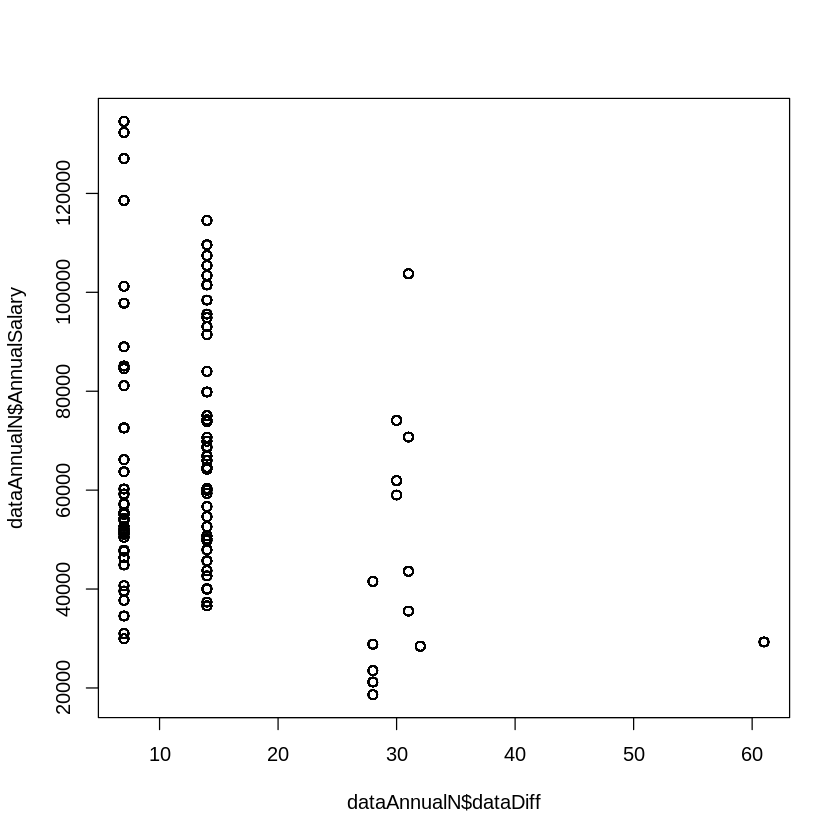

In [37]:
plot(dataAnnualN$dataDiff, dataAnnualN$AnnualSalary)

In [38]:
colnames(dataAnnualN)

[1] "lat"          "long"         "State"        "Male"         "Female"      
 [6] "account"      "balance"      "date"         "amount"       "gender"      
[11] "dataDiff"     "AnnualSalary" "MedianSal"

In [39]:
# Since there is only one datapoint above 40 in the column `datadiff`
# We could drop it

dataAnnualN = filter(dataAnnualN,dataDiff < 40)

In [40]:
dataAnnualN = dataAnnualN |> select(c('account', 'dataDiff', 'AnnualSalary', 'MedianSal'))

In [41]:
colnames(data)

[1] "status"            "card_present_flag" "bpay_biller_code" 
 [4] "account"           "currency"          "long"             
 [7] "lat"               "txn_description"   "merchant_id"      
[10] "merchant_code"     "first_name"        "balance"          
[13] "date"              "gender"            "age"              
[16] "merchant_suburb"   "merchant_state"    "extraction"       
[19] "amount"            "transaction_id"    "country"          
[22] "customer_id"       "merchant_long_lat" "movement"

In [42]:
data = merge(dataAnnualN, data, by = 'account')

In [43]:
colSums(is.na(data))/nrow(data)*100 

account          dataDiff      AnnualSalary         MedianSal 
          0.00000           0.00000           0.00000           0.00000 
           status card_present_flag  bpay_biller_code          currency 
          0.00000          27.99297          94.42019           0.00000 
             long               lat   txn_description       merchant_id 
          0.00000           0.00000           0.00000          27.99297 
    merchant_code        first_name           balance              date 
         94.43022           0.00000           0.00000           0.00000 
           gender               age   merchant_suburb    merchant_state 
          0.00000           0.00000          27.99297          27.99297 
       extraction            amount    transaction_id           country 
          0.00000           0.00000           0.00000           0.00000 
      customer_id merchant_long_lat          movement 
          0.00000          27.99297           0.00000

In [44]:
data = data[colSums(is.na(data))/nrow(data)*100 < 0.2]

In [45]:
dim(data)

[1] 1975678      20

In [46]:
zeroVarCol = nearZeroVar(data)

In [47]:
zeroVarCol

[1]  6 18

In [48]:
# Remove the Zero Variance Columns

data = data |>
          select(-all_of(zeroVarCol))

In [49]:
colnames(data)

[1] "account"         "dataDiff"        "AnnualSalary"    "MedianSal"      
 [5] "status"          "long"            "lat"             "txn_description"
 [9] "first_name"      "balance"         "date"            "gender"         
[13] "age"             "extraction"      "amount"          "transaction_id" 
[17] "customer_id"     "movement"

In [50]:
# taking data within 60 year old since there isn't a lot of data ofr people above 60

data = filter(data, age < 60)

In [51]:
data = data |> select(-c('long', 'lat', 'first_name','gender'))

In [52]:
data$date = weekdays(data$date)

In [53]:
head(data$extraction)

[1] "2018-09-09T09:24:40.000+0000" "2018-10-12T22:35:06.000+0000"
[3] "2018-08-14T13:11:59.000+0000" "2018-10-06T08:19:36.000+0000"
[5] "2018-10-11T15:00:00.000+0000" "2018-10-22T09:51:36.000+0000"

In [54]:
data$extraction = rm_between(data$extraction, "T", ".", extract=TRUE)

In [55]:
data = data |> 
         mutate(time = sapply(extraction, toString))

In [56]:
library(lubridate)

In [57]:
data$time = hms(data$time)

In [58]:
data = data |>
          mutate(timing = 
              case_when(
                        (time > period(23, 'hours') & time <= period(24, 'hours') |
                        time < period(c(1,1) , c('hours', 'minute')) | 
                        time > period(1,'hours') & time <= period(6, 'hours')) ~ 'Midnight',
                        (time > period(6, 'hours') & time <= period(10, 'hours')) ~ 'Morning',
                        (time > period(10, 'hours') & time <= period(15, 'hours')) ~ 'Afternoon',
                        (time > period(15, 'hours') & time <= period(19, 'hours')) ~ 'Evening',
                        (time > period(19, 'hours') & time <= period(23, 'hours')) ~ 'Night'
              ))

In [59]:
sum(is.na(data$timing))

[1] 0

In [60]:
# Creating a new features for age

data$under25 = ifelse(data$age < 25, 1, 0)
data$bw25n40 = ifelse(data$age >= 25 & data$age <= 40,1,0)
data$above40 = ifelse(data$age >40, 1,0)

In [61]:
head(data)

,account,dataDiff,AnnualSalary,MedianSal,status,txn_description,balance,date,age,extraction,amount,transaction_id,customer_id,movement,time,timing,under25,bw25n40,above40
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<list>,<dbl>,<chr>,<chr>,<chr>,<Period>,<chr>,<dbl>,<dbl>,<dbl>
1,ACC-1037050564,7,46388.68,77922,authorized,SALES-POS,2832.09,Sunday,40,09:24:40,134.75,12fc30647aa6429f93b9ad9bf032a16e,CUS-1614226872,debit,9H 24M 40S,Morning,0,1,0
2,ACC-1037050564,7,46388.68,77922,authorized,POS,4317.20,Friday,40,22:35:06,25.38,f03d58b9159048f7a87ba4355a9ea75b,CUS-1614226872,debit,22H 35M 6S,Night,0,1,0
3,ACC-1037050564,7,46388.68,77922,authorized,POS,1974.44,Tuesday,40,13:11:59,51.04,9209437b7fdb43c386e0da24aaa01b97,CUS-1614226872,debit,13H 11M 59S,Afternoon,0,1,0
4,ACC-1037050564,7,46388.68,77922,authorized,POS,3893.64,Saturday,40,08:19:36,13.26,b3ab69ce37d141b59aded37d28b31e09,CUS-1614226872,debit,8H 19M 36S,Morning,0,1,0
5,ACC-1037050564,7,46388.68,77922,posted,PAYMENT,4382.79,Thursday,40,15:00:00,33.00,4100f5ab6df04539bea264d699e96079,CUS-1614226872,debit,15H 0M 0S,Afternoon,0,1,0
6,ACC-1037050564,7,46388.68,77922,authorized,POS,4654.98,Monday,40,09:51:36,13.48,081e0405da334288a6f97f970dfa00b8,CUS-1614226872,debit,9H 51M 36S,Morning,0,1,0


In [62]:
unique(data$txn_description)

[1] "SALES-POS"  "POS"        "PAYMENT"    "PAY/SALARY" "INTER BANK"
[6] "PHONE BANK"

In [63]:
dataSalesWeekday = filter(data, txn_description == 'POS' | txn_description == 'SALES-POS' | txn_description == 'PAYMENT' )

In [64]:
dataAnnualSalW = data[c('account', 'AnnualSalary')]

In [65]:
dataSalesAmtAgg = aggregate(amount~date+account, dataSalesWeekday, sum)

In [66]:
head(dataSalesAmtAgg)

,date,account,amount
,<chr>,<chr>,<dbl>
1,Friday,ACC-1037050564,332581.9
2,Monday,ACC-1037050564,206148.5
3,Saturday,ACC-1037050564,423066.1
4,Sunday,ACC-1037050564,268080.5
5,Thursday,ACC-1037050564,339473.9
6,Tuesday,ACC-1037050564,138189.5


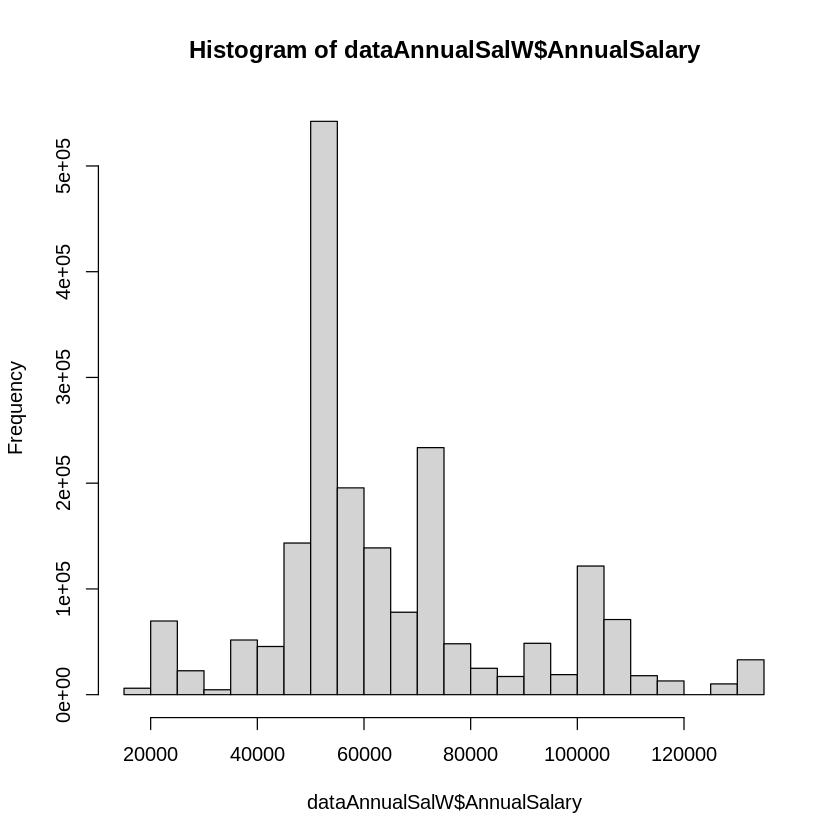

In [67]:
hist(dataAnnualSalW$AnnualSalary)

In [68]:
dataAnnualSalW = unique(dataAnnualSalW[,c('account','AnnualSalary')])

In [69]:
# Classifying the various Income

for(i in 1:nrow(dataAnnualSalW)){
  if(dataAnnualSalW$AnnualSalary[i] <= 20000){
    
    dataAnnualSalW$IncomeBracket[i] = 'Low Income'
  }

  else if(dataAnnualSalW$AnnualSalary[i] >= 20000 & dataAnnualSalW$AnnualSalary[i] <= 60000 ){
    
    dataAnnualSalW$IncomeBracket[i] = 'Low Middle Income'
  }

  else if(dataAnnualSalW$AnnualSalary[i] > 60000 & dataAnnualSalW$AnnualSalary[i] <= 100000){
    
    dataAnnualSalW$IncomeBracket[i] = 'High Middle Income'
  }

  else if(dataAnnualSalW$AnnualSalary[i] > 100000 & dataAnnualSalW$AnnualSalary[i] <= 140000){
    
    dataAnnualSalW$IncomeBracket[i] = 'High Income'
  }

}

In [70]:
dataSalesAmtAgg = merge(dataAnnualSalW, dataSalesAmtAgg, by = 'account')

In [71]:
dataSalesAmtAgg$date = factor(dataSalesAmtAgg$date, levels= c("Monday", 
    "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
dataSalesAmtAgg$IncomeBracket = factor(dataSalesAmtAgg$IncomeBracket, levels = c('Low Income', 'Low Middle Income',
                                        'High Middle Income', 'High Income'))

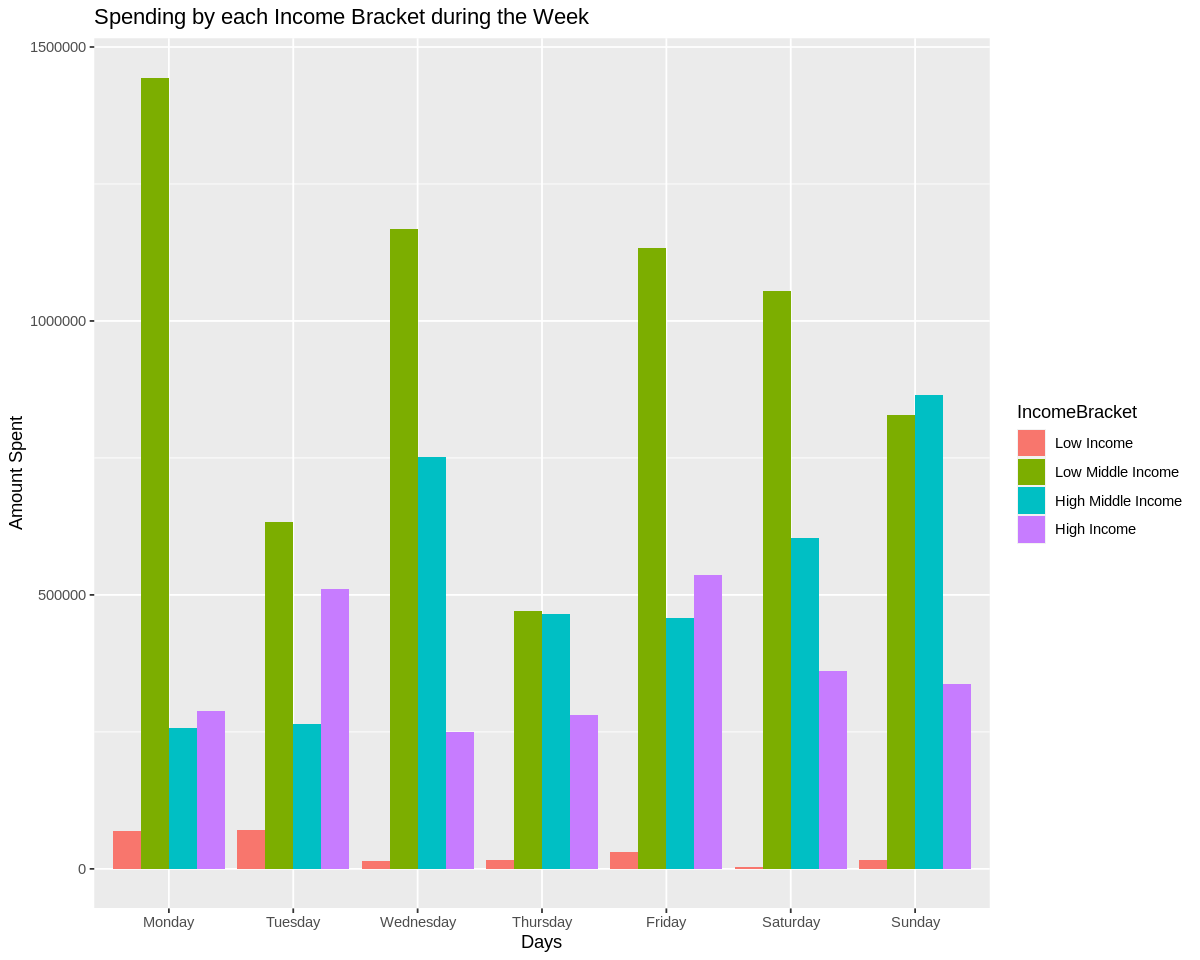

In [72]:
options(repr.plot.width=10, repr.plot.height=8)

ggplot(dataSalesAmtAgg, aes(date, amount))+
    geom_bar(aes(fill = IncomeBracket),
                    position = "dodge",
                    stat = "identity")+
    labs(title = 'Spending by each Income Bracket during the Week', 
    x= 'Days', y = 'Amount Spent' )

In [73]:
data = dataAnnualSalW %>% 
          select(c('account', 'IncomeBracket')) %>%
          merge(., data, by = 'account')

In [74]:
table(data$movement)


 credit   debit 
 107061 1849313 

In [75]:
colnames(data)

[1] "account"         "IncomeBracket"   "dataDiff"        "AnnualSalary"   
 [5] "MedianSal"       "status"          "txn_description" "balance"        
 [9] "date"            "age"             "extraction"      "amount"         
[13] "transaction_id"  "customer_id"     "movement"        "time"           
[17] "timing"          "under25"         "bw25n40"         "above40"

In [76]:
dataMlOne = data

In [77]:
head(dataMlOne)

,account,IncomeBracket,dataDiff,AnnualSalary,MedianSal,status,txn_description,balance,date,age,extraction,amount,transaction_id,customer_id,movement,time,timing,under25,bw25n40,above40
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<list>,<dbl>,<chr>,<chr>,<chr>,<Period>,<chr>,<dbl>,<dbl>,<dbl>
1,ACC-1037050564,Low Middle Income,7,46388.68,77922,authorized,SALES-POS,2832.09,Sunday,40,09:24:40,134.75,12fc30647aa6429f93b9ad9bf032a16e,CUS-1614226872,debit,9H 24M 40S,Morning,0,1,0
2,ACC-1037050564,Low Middle Income,7,46388.68,77922,authorized,POS,4317.20,Friday,40,22:35:06,25.38,f03d58b9159048f7a87ba4355a9ea75b,CUS-1614226872,debit,22H 35M 6S,Night,0,1,0
3,ACC-1037050564,Low Middle Income,7,46388.68,77922,authorized,POS,1974.44,Tuesday,40,13:11:59,51.04,9209437b7fdb43c386e0da24aaa01b97,CUS-1614226872,debit,13H 11M 59S,Afternoon,0,1,0
4,ACC-1037050564,Low Middle Income,7,46388.68,77922,authorized,POS,3893.64,Saturday,40,08:19:36,13.26,b3ab69ce37d141b59aded37d28b31e09,CUS-1614226872,debit,8H 19M 36S,Morning,0,1,0
5,ACC-1037050564,Low Middle Income,7,46388.68,77922,posted,PAYMENT,4382.79,Thursday,40,15:00:00,33.00,4100f5ab6df04539bea264d699e96079,CUS-1614226872,debit,15H 0M 0S,Afternoon,0,1,0
6,ACC-1037050564,Low Middle Income,7,46388.68,77922,authorized,POS,4654.98,Monday,40,09:51:36,13.48,081e0405da334288a6f97f970dfa00b8,CUS-1614226872,debit,9H 51M 36S,Morning,0,1,0


In [78]:
## drop some unnessary columns

removeCol = c('account','date','age', 'extraction', 'transaction_id', 'customer_id', 'time', 'IncomeBracket', 'balance')

data = dataMlOne |>
            select(-all_of(removeCol))

In [79]:
head(data)

,dataDiff,AnnualSalary,MedianSal,status,txn_description,amount,movement,timing,under25,bw25n40,above40
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,7,46388.68,77922,authorized,SALES-POS,134.75,debit,Morning,0,1,0
2,7,46388.68,77922,authorized,POS,25.38,debit,Night,0,1,0
3,7,46388.68,77922,authorized,POS,51.04,debit,Afternoon,0,1,0
4,7,46388.68,77922,authorized,POS,13.26,debit,Morning,0,1,0
5,7,46388.68,77922,posted,PAYMENT,33.00,debit,Afternoon,0,1,0
6,7,46388.68,77922,authorized,POS,13.48,debit,Morning,0,1,0


In [80]:
dataML <- filter(data, txn_description != 'PAY/SALARY')

In [81]:
unique(dataML$txn_description)

[1] "SALES-POS"  "POS"        "PAYMENT"    "INTER BANK" "PHONE BANK"

In [82]:
table(dataML$movement)


  debit 
1849313 

In [83]:
dataML =select(dataML, - 'movement')

In [84]:
head(dataML)

,dataDiff,AnnualSalary,MedianSal,status,txn_description,amount,timing,under25,bw25n40,above40
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,7,46388.68,77922,authorized,SALES-POS,134.75,Morning,0,1,0
2,7,46388.68,77922,authorized,POS,25.38,Night,0,1,0
3,7,46388.68,77922,authorized,POS,51.04,Afternoon,0,1,0
4,7,46388.68,77922,authorized,POS,13.26,Morning,0,1,0
5,7,46388.68,77922,posted,PAYMENT,33.00,Afternoon,0,1,0
6,7,46388.68,77922,authorized,POS,13.48,Morning,0,1,0


In [85]:
any(is.na(dataML))

[1] FALSE

In [86]:
dataML = dummy_cols(dataML, select_columns = c('status','txn_description','timing'),
                            remove_selected_columns = T)

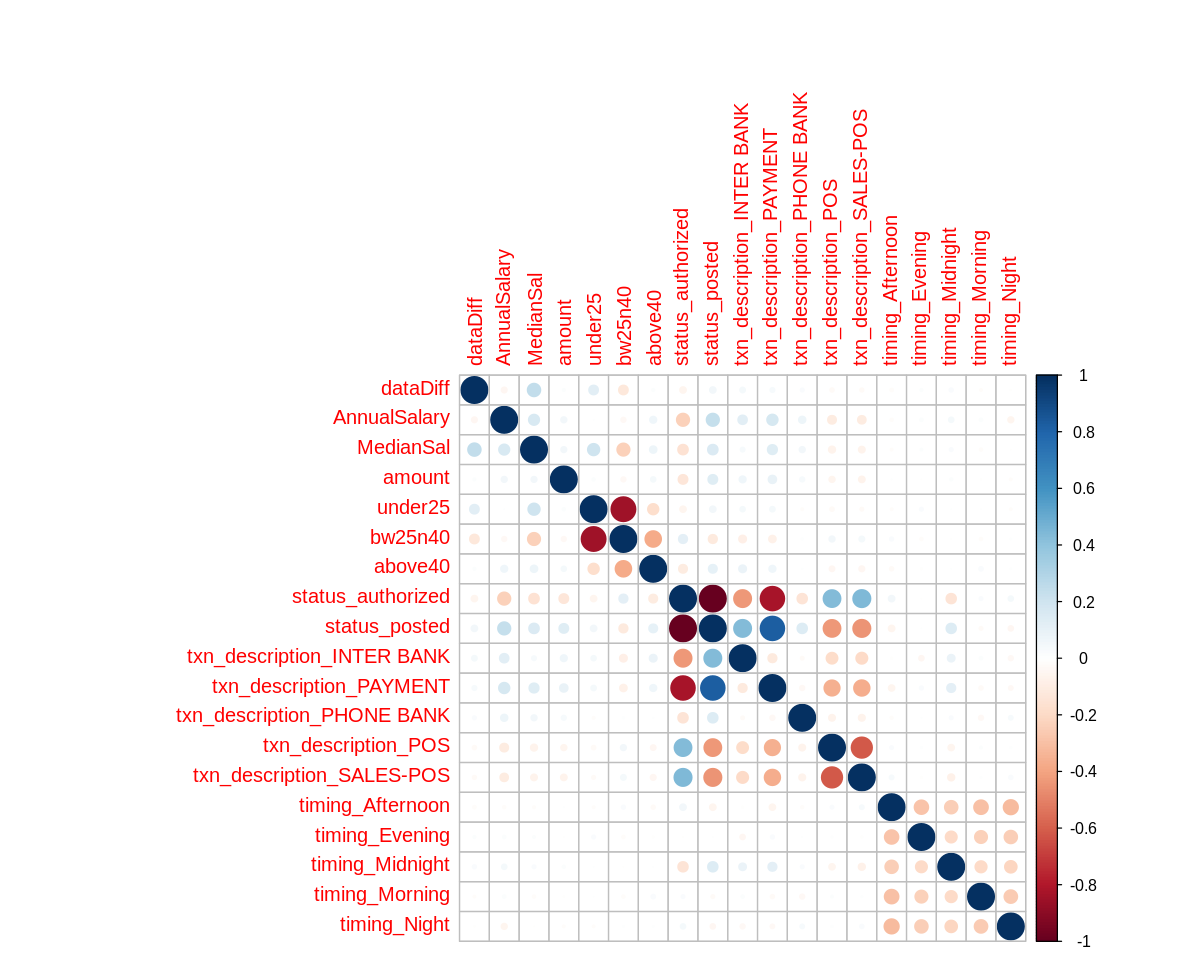

In [87]:
corrplot(cor(dataML))

#### Predictive Modelling

In [88]:
set.seed(100)

In [89]:
# Creating train test split

inTrain = createDataPartition(dataML$AnnualSalary, p =0.7, list =F)

trainData = dataML[inTrain,]
testData = dataML[-inTrain,]



#### Fitting a Linear Regression

In [90]:
fitLm = caret::train(AnnualSalary~., trainData, method = 'lm')

In [91]:
summary(fitLm)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
   Min     1Q Median     3Q    Max 
-58302 -14582  -5792  13076  68433 

Coefficients: (5 not defined because of singularities)
                                     Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                         4.827e+04  3.373e+02  143.110  < 2e-16 ***
dataDiff                           -3.238e+02  2.800e+00 -115.631  < 2e-16 ***
MedianSal                           4.569e-01  2.490e-03  183.490  < 2e-16 ***
amount                              2.617e+00  1.405e-01   18.626  < 2e-16 ***
under25                            -3.943e+03  8.137e+01  -48.459  < 2e-16 ***
bw25n40                            -2.511e+03  7.741e+01  -32.437  < 2e-16 ***
above40                                    NA         NA       NA       NA    
status_authorized                  -2.164e+04  2.370e+02  -91.282  < 2e-16 ***
status_posted                              NA         NA       NA       NA    
`\\`txn_description_INTE

In [92]:
ModelPredictLM =predict(fitLm, testData)

In [93]:
rsq <- function (x, y) cor(x, y) ^ 2

In [94]:
rmse(ModelPredictLM, testData$AnnualSalary)

[1] 21945.21

In [95]:
rsq(ModelPredictLM, testData$AnnualSalary)

[1] 0.09076561

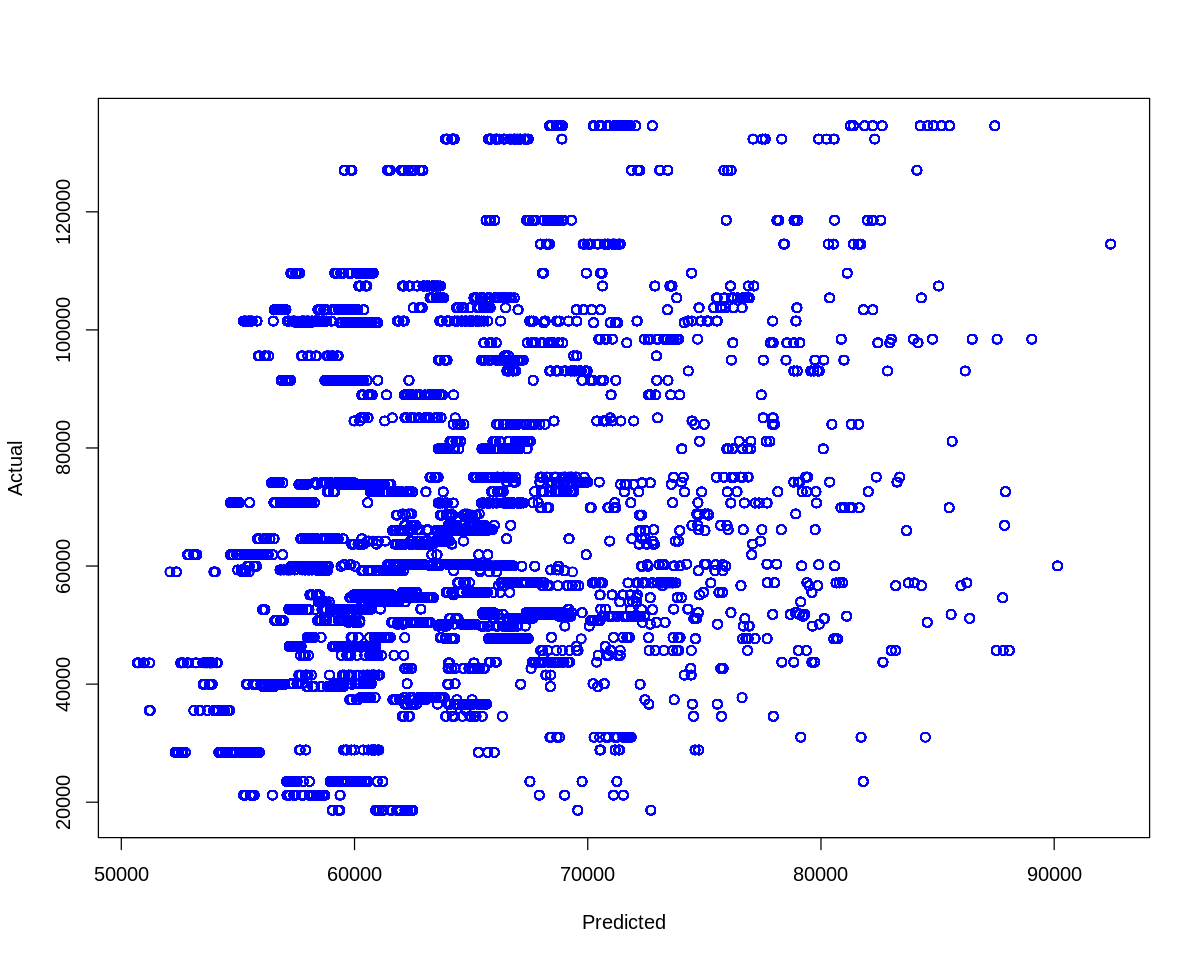

In [96]:
plot(ModelPredictLM, testData$AnnualSalary,
      xlab = 'Predicted', ylab = 'Actual',
      col = 'Blue')

#### Fitting a Ridge Regression

In [97]:
lambda = 10^seq(-7, 7, length = 100)

In [98]:
fitRidge = caret::train(AnnualSalary~., trainData, 
                      method = 'glmnet', 
                      trControl = trainControl("cv", number = 10),
                      tuneGrid = expand.grid(alpha = 0, lambda= lambda))

In [99]:
fitRidge$bestTune

,alpha,lambda
,<dbl>,<dbl>
69,0,413.2012


In [100]:
ModelPredictRidge = predict(fitRidge, testData)

In [101]:
rmse(ModelPredictRidge, testData$AnnualSalary)

[1] 21945.56

In [102]:
rsq(ModelPredictRidge, testData$AnnualSalary)

[1] 0.09076598

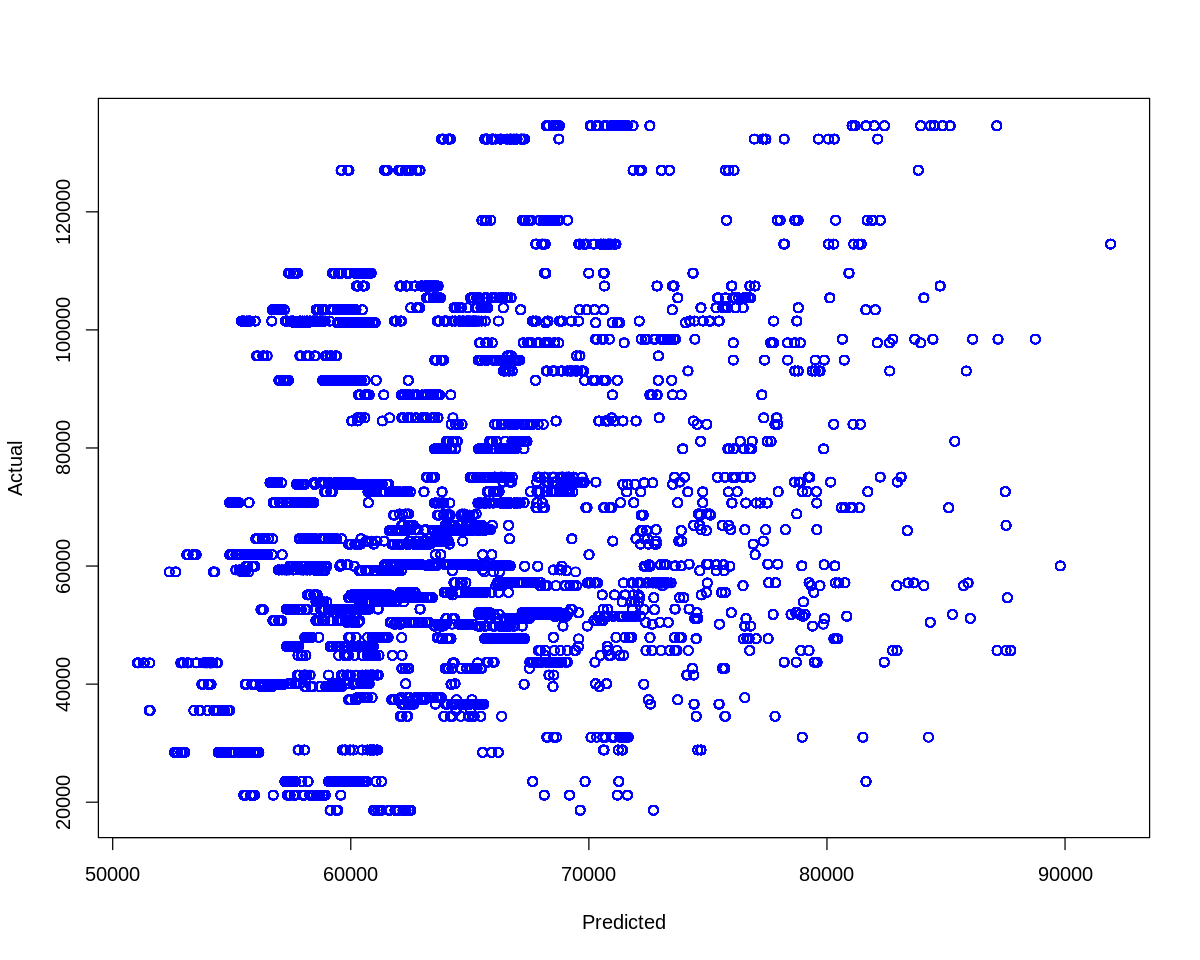

In [103]:
plot(ModelPredictRidge, testData$AnnualSalary,
      xlab = 'Predicted', ylab = 'Actual',
      col = 'Blue')

#### Fitting a SGD Regressor

In [104]:
fitSDG = sgd(AnnualSalary~., trainData, model = 'lm')

In [105]:
summary(fitSDG)

              Length  Class  Mode     
model               1 -none- character
coefficients       19 -none- numeric  
converged           1 -none- logical  
estimates         114 -none- numeric  
pos                 6 -none- numeric  
times               6 -none- numeric  
model.out           2 -none- list     
fitted.values 1294520 -none- numeric  
residuals     1294520 -none- numeric  

In [106]:
rmse(trainData$AnnualSalary,fitSDG$fitted.values)

[1] 25948.57

In [107]:
ModelPredictSDG = predict(fitSDG, as.matrix(testData))

In [108]:
rmse(ModelPredictSDG, testData$AnnualSalary)

[1] 25948.67

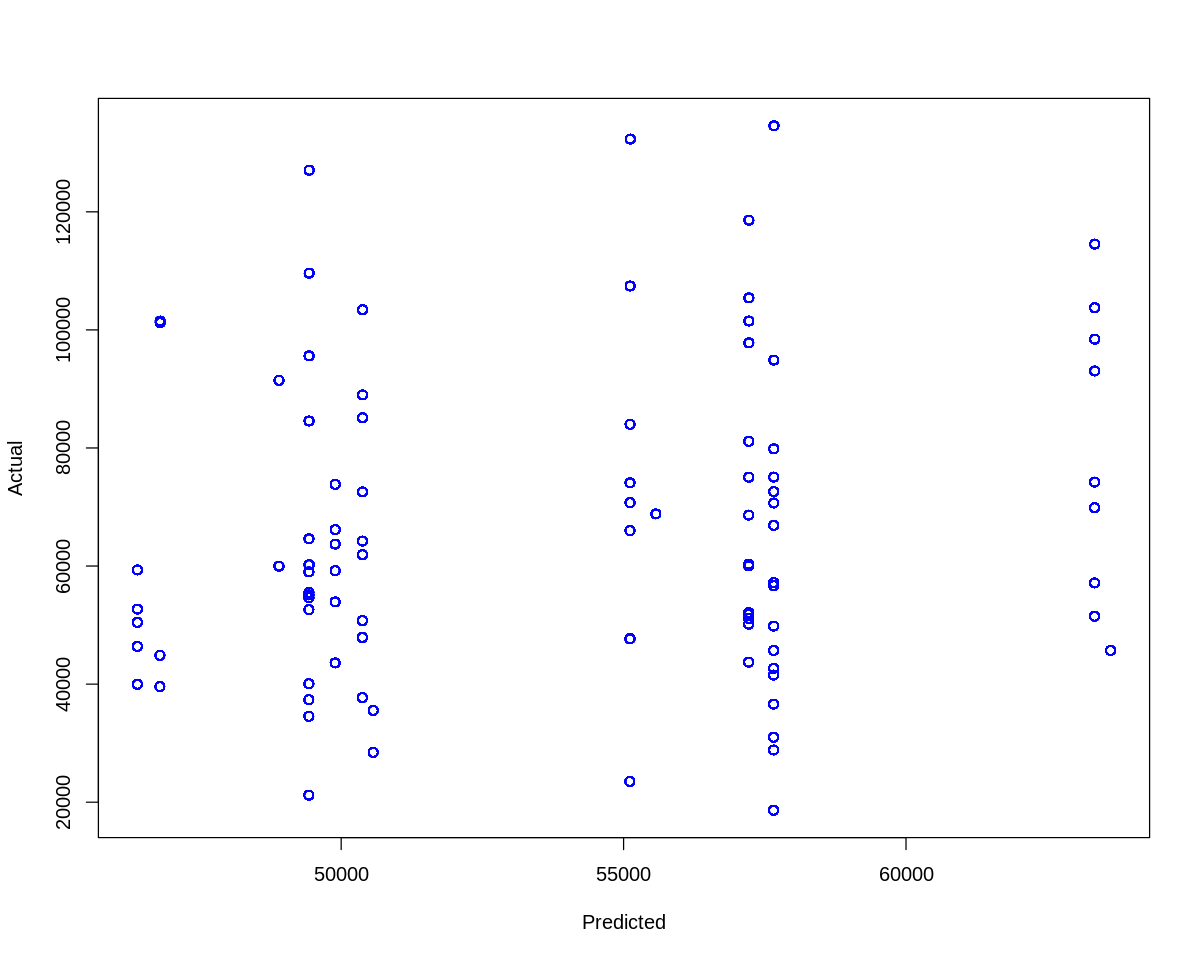

In [109]:
plot(ModelPredictSDG, testData$AnnualSalary,
      xlab = 'Predicted', ylab = 'Actual',
      col = 'Blue')

#### Fitting a Decision Tree

In [110]:
modelCaretD = caret::train(x = trainData[, names(trainData) != 'AnnualSalary'], 
                           y = trainData$AnnualSalary,
                          method = "rpart",
                          trControl = trainControl("cv", number = 10),
                            tuneLength = 100)

In [111]:
modelCaretD

CART 

1294520 samples
     18 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1165069, 1165068, 1165067, 1165068, 1165068, 1165067, ... 
Resampling results across tuning parameters:

  cp            RMSE       Rsquared   MAE      
  0.0003959695   9494.379  0.8298794   4452.266
  0.0004070077   9547.709  0.8279643   4486.063
  0.0004070800   9547.709  0.8279643   4486.063
  0.0004135781   9588.025  0.8265117   4509.603
  0.0004157745   9592.618  0.8263451   4514.180
  0.0004205563   9616.221  0.8254893   4529.320
  0.0004241079   9634.020  0.8248448   4541.043
  0.0004313702   9663.721  0.8237650   4566.136
  0.0004331571   9677.688  0.8232522   4573.981
  0.0004362138   9698.527  0.8224868   4590.686
  0.0004380888   9715.751  0.8218611   4599.348
  0.0004453843   9734.133  0.8211852   4617.050
  0.0004523285   9782.011  0.8194177   4677.954
  0.0004523757   9782.011  0.8194177   4677.954
  0.0004567886   9823.853  0.8178754   4717.201
  0

In [112]:
modelCaretD$bestTune

,cp
,<dbl>
1,0.0003959695


In [113]:
ModelPredictD = predict(modelCaretD, testData)

In [114]:
rmse(ModelPredictD, testData$AnnualSalary)

[1] 9594.132

In [115]:
rsq(ModelPredictD, testData$AnnualSalary)

[1] 0.8262167

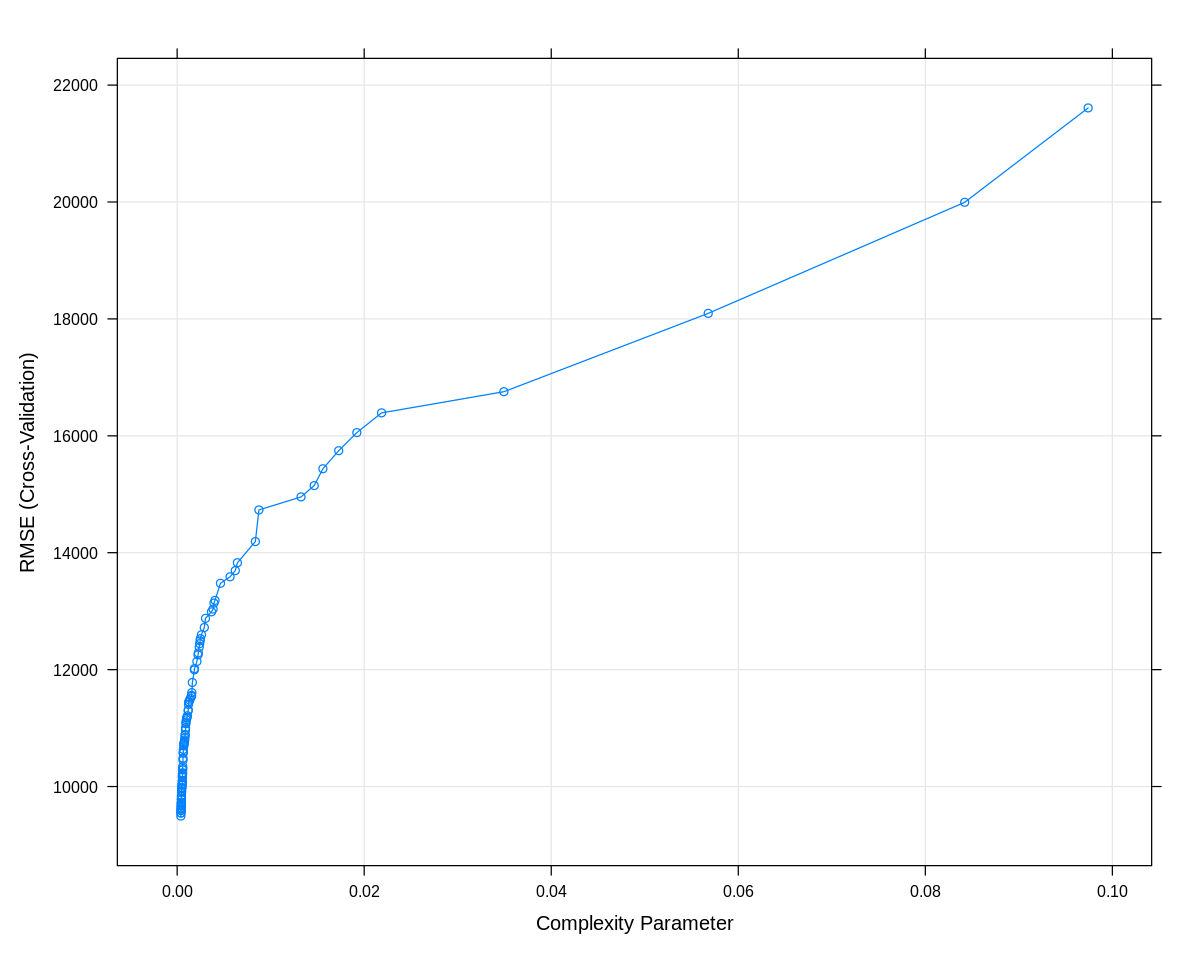

In [116]:
plot(modelCaretD)

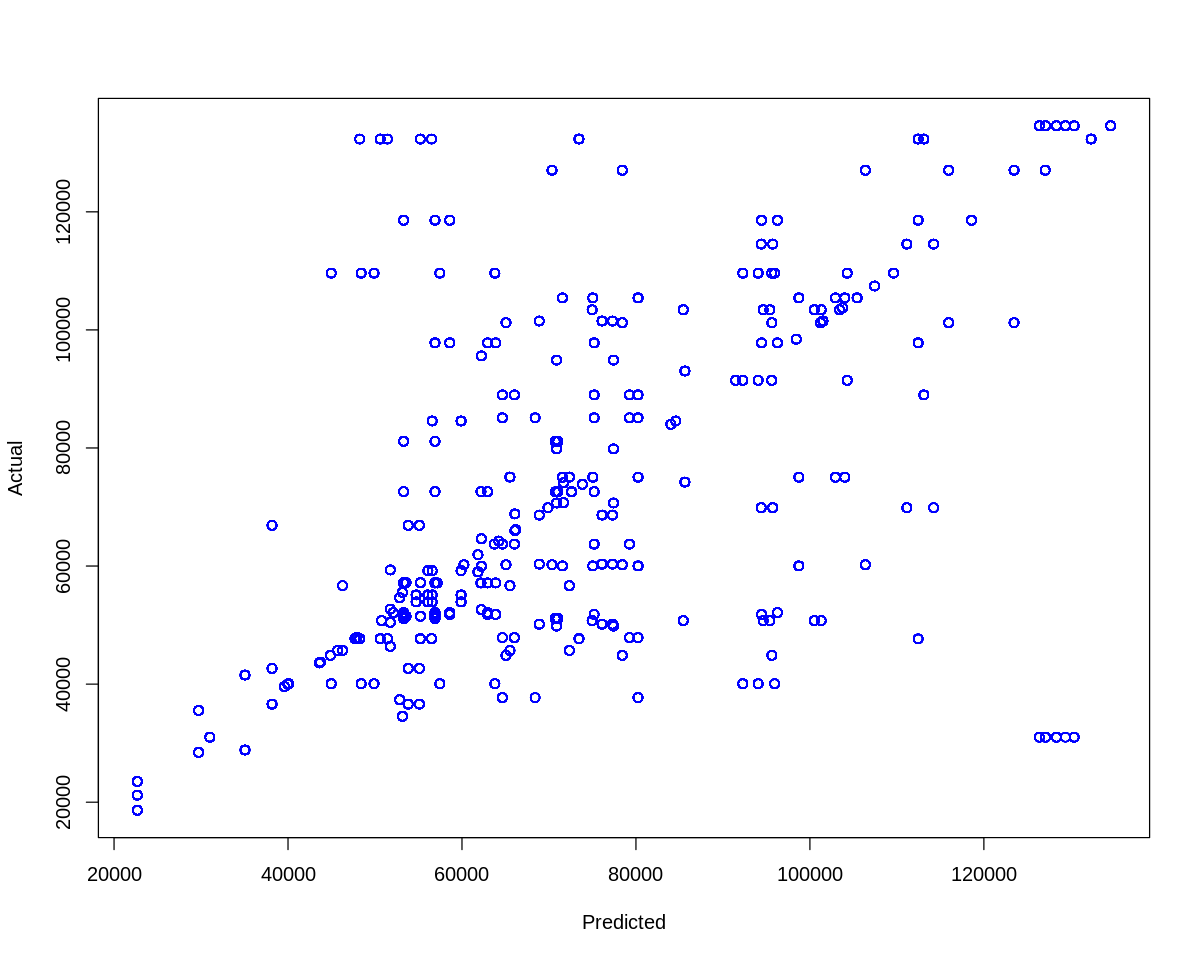

In [117]:
plot(ModelPredictD, testData$AnnualSalary,
     xlab = 'Predicted', ylab = 'Actual',
      col = 'Blue')